# Customer Churn Analysis & Risk Segmentation Platform
# End-to-end churn analysis using Python, ML, and business logic to support retention decisions

In [129]:
import pandas as pd

## 1. Data Loading
# Load the customer churn dataset into a dataframe
df = pd.read_csv("../data/customer_churn_data.csv")

In [130]:
# Check number of rows and columns in the dataset
## 2. Initial Data Overview
df.shape

(10000, 32)

In [111]:
# Preview the first few rows of the dataset
df.head()

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0


In [112]:
# Preview the last few rows of the dataset
df.tail()

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
9995,CUST_09996,Female,67,Germany,Sydney,SME,37,Web,Yearly,15,...,34.240174,Service,4.0,1,0.36,0.28,20,Satisfied,2,0
9996,CUST_09997,Male,26,USA,Toronto,Individual,42,Mobile,Yearly,13,...,40.092087,NaN,4.0,0,0.48,0.06,28,Unsatisfied,2,0
9997,CUST_09998,Female,18,Canada,Sydney,Individual,39,Mobile,Yearly,15,...,25.215810,Technical,1.0,0,0.11,0.07,-30,Satisfied,1,0
9998,CUST_09999,Female,30,USA,Delhi,Individual,52,Web,Monthly,14,...,20.544921,NaN,2.0,0,0.25,0.31,58,Neutral,1,1
9999,CUST_10000,Male,67,UK,Berlin,SME,7,Mobile,Monthly,15,...,23.536914,Technical,4.0,1,0.40,0.30,1,Satisfied,1,0


In [113]:
# View column names, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  object 
 1   gender                  10000 non-null  object 
 2   age                     10000 non-null  int64  
 3   country                 10000 non-null  object 
 4   city                    10000 non-null  object 
 5   customer_segment        10000 non-null  object 
 6   tenure_months           10000 non-null  int64  
 7   signup_channel          10000 non-null  object 
 8   contract_type           10000 non-null  object 
 9   monthly_logins          10000 non-null  int64  
 10  weekly_active_days      10000 non-null  int64  
 11  avg_session_time        10000 non-null  float64
 12  features_used           10000 non-null  int64  
 13  usage_growth_rate       10000 non-null  float64
 14  last_login_days_ago     10000 non-null 

In [114]:
# Check missing values in each column (sorted by highest first)
## 3. Missing Values Analysis
df.isnull().sum().sort_values(ascending=False)

complaint_type            2045
customer_id                  0
gender                       0
referral_count               0
survey_response              0
nps_score                    0
marketing_click_rate         0
email_open_rate              0
escalations                  0
csat_score                   0
avg_resolution_time          0
support_tickets              0
price_increase_last_3m       0
discount_applied             0
payment_failures             0
payment_method               0
total_revenue                0
monthly_fee                  0
last_login_days_ago          0
usage_growth_rate            0
features_used                0
avg_session_time             0
weekly_active_days           0
monthly_logins               0
contract_type                0
signup_channel               0
tenure_months                0
customer_segment             0
city                         0
country                      0
age                          0
churn                        0
dtype: i

In [115]:
# Show percentage of missing values per column
(df.isnull().mean() * 100).sort_values(ascending=False)

complaint_type            20.45
customer_id                0.00
gender                     0.00
referral_count             0.00
survey_response            0.00
nps_score                  0.00
marketing_click_rate       0.00
email_open_rate            0.00
escalations                0.00
csat_score                 0.00
avg_resolution_time        0.00
support_tickets            0.00
price_increase_last_3m     0.00
discount_applied           0.00
payment_failures           0.00
payment_method             0.00
total_revenue              0.00
monthly_fee                0.00
last_login_days_ago        0.00
usage_growth_rate          0.00
features_used              0.00
avg_session_time           0.00
weekly_active_days         0.00
monthly_logins             0.00
contract_type              0.00
signup_channel             0.00
tenure_months              0.00
customer_segment           0.00
city                       0.00
country                    0.00
age                        0.00
churn   

In [116]:
# Count duplicate rows in the dataset
## 4. Duplicate Records Check
df.duplicated().sum()

np.int64(0)

In [117]:
# Check for duplicate customer IDs
df["customer_id"].duplicated().sum()

np.int64(0)

In [118]:
## 5. Categorical Data Exploration
# Explore unique values and top categories for each categorical column
for col in df.select_dtypes(include="object").columns:
    print(f"\nColumn: {col}")
    print("Unique Values:", df[col].nunique())
    print(df[col].value_counts().head(10))


Column: customer_id
Unique Values: 10000
customer_id
CUST_00001    1
CUST_06671    1
CUST_06664    1
CUST_06665    1
CUST_06666    1
CUST_06667    1
CUST_06668    1
CUST_06669    1
CUST_06670    1
CUST_06672    1
Name: count, dtype: int64

Column: gender
Unique Values: 2
gender
Male      5013
Female    4987
Name: count, dtype: int64

Column: country
Unique Values: 7
country
Bangladesh    1494
Canada        1488
USA           1442
India         1427
Australia     1400
UK            1382
Germany       1367
Name: count, dtype: int64

Column: city
Unique Values: 7
city
London      1518
Sydney      1471
Dhaka       1459
Delhi       1402
Berlin      1386
New York    1385
Toronto     1379
Name: count, dtype: int64

Column: customer_segment
Unique Values: 3
customer_segment
Individual    5984
SME           3029
Enterprise     987
Name: count, dtype: int64

Column: signup_channel
Unique Values: 3
signup_channel
Web         5036
Mobile      2960
Referral    2004
Name: count, dtype: int64

Colum

In [10]:
## 6. Numerical Data Summary
# Summary statistics for numerical columns
df.describe()

,age,tenure_months,monthly_logins,weekly_active_days,avg_session_time,features_used,usage_growth_rate,last_login_days_ago,monthly_fee,total_revenue,payment_failures,support_tickets,avg_resolution_time,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,referral_count,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000
mean,45.906100,30.155700,19.672000,3.479400,15.187890,4.990800,0.019423,9.505200,34.930000,1057.018000,0.501000,1.206600,23.953210,3.486700,0.294100,0.499610,0.253575,19.110500,0.9922,0.102100
std,16.420416,17.099517,9.838003,2.302283,6.830774,2.211607,0.149567,9.799417,23.785115,1020.148233,0.711934,1.104554,9.956999,0.978631,0.543171,0.231601,0.140532,38.936619,0.9939,0.302795
min,18.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-0.580000,0.000000,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.100000,0.010000,-100.000000,0.0000,0.000000
25%,32.000000,16.000000,13.000000,1.000000,10.391645,3.000000,-0.080000,2.000000,20.000000,340.000000,0.000000,0.000000,17.082041,3.000000,0.000000,0.300000,0.130000,-7.000000,0.0000,0.000000
50%,46.000000,30.000000,20.000000,3.000000,15.161659,5.000000,0.020000,6.000000,30.000000,720.000000,0.000000,1.000000,23.950444,4.000000,0.000000,0.500000,0.250000,19.000000,1.0000,0.000000
75%,60.000000,45.000000,26.000000,5.000000,19.882034,6.000000,0.120000,13.000000,50.000000,1440.000000,1.000000,2.000000,30.758480,4.000000,1.000000,0.700000,0.380000,46.000000,2.0000,0.000000
max,74.000000,59.000000,54.000000,7.000000,41.996411,15.000000,0.540000,80.000000,100.000000,5900.000000,5.000000,7.000000,61.821878,5.000000,4.000000,0.900000,0.500000,100.000000,7.0000,1.000000


In [11]:
df

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CUST_09996,Female,67,Germany,Sydney,SME,37,Web,Yearly,15,...,34.240174,Service,4.0,1,0.36,0.28,20,Satisfied,2,0
9996,CUST_09997,Male,26,USA,Toronto,Individual,42,Mobile,Yearly,13,...,40.092087,NaN,4.0,0,0.48,0.06,28,Unsatisfied,2,0
9997,CUST_09998,Female,18,Canada,Sydney,Individual,39,Mobile,Yearly,15,...,25.215810,Technical,1.0,0,0.11,0.07,-30,Satisfied,1,0
9998,CUST_09999,Female,30,USA,Delhi,Individual,52,Web,Monthly,14,...,20.544921,NaN,2.0,0,0.25,0.31,58,Neutral,1,1


In [119]:
# Count missing values in the complaint_type column
df['complaint_type'].isnull().sum()

np.int64(2045)

In [120]:
## 7. Data Cleaning
# Replace missing complaint_type values with 'No Complaint'
df["complaint_type"] = df["complaint_type"].fillna("No Complaint")

In [121]:
df['complaint_type']

0            Service
1            Billing
2            Service
3          Technical
4          Technical
            ...     
9995         Service
9996    No Complaint
9997       Technical
9998    No Complaint
9999       Technical
Name: complaint_type, Length: 10000, dtype: object

In [122]:
# View count of each complaint type
df["complaint_type"].value_counts()

complaint_type
Technical       3498
Billing         2427
No Complaint    2045
Service         2030
Name: count, dtype: int64

In [123]:
## 8. Feature Classification
# Identify all categorical (object-type) columns
categorical_cols = df.select_dtypes(include="object").columns

In [124]:
categorical_cols

Index(['customer_id', 'gender', 'country', 'city', 'customer_segment',
       'signup_channel', 'contract_type', 'payment_method', 'discount_applied',
       'price_increase_last_3m', 'complaint_type', 'survey_response'],
      dtype='object')

In [125]:
# Check distribution of contract types
df["contract_type"].value_counts()

contract_type
Monthly      4967
Quarterly    3050
Yearly       1983
Name: count, dtype: int64

In [126]:
# Clean text in categorical columns (trim spaces and convert to lowercase)
for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

In [127]:
df['contract_type']

0       monthly
1       monthly
2        yearly
3        yearly
4       monthly
         ...   
9995     yearly
9996     yearly
9997     yearly
9998    monthly
9999    monthly
Name: contract_type, Length: 10000, dtype: object

In [128]:
# Identify all numerical columns
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns

In [22]:
# View summary statistics for numerical columns only
df[numerical_cols].describe()

,age,tenure_months,monthly_logins,weekly_active_days,avg_session_time,features_used,usage_growth_rate,last_login_days_ago,monthly_fee,total_revenue,payment_failures,support_tickets,avg_resolution_time,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,referral_count,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000
mean,45.906100,30.155700,19.672000,3.479400,15.187890,4.990800,0.019423,9.505200,34.930000,1057.018000,0.501000,1.206600,23.953210,3.486700,0.294100,0.499610,0.253575,19.110500,0.9922,0.102100
std,16.420416,17.099517,9.838003,2.302283,6.830774,2.211607,0.149567,9.799417,23.785115,1020.148233,0.711934,1.104554,9.956999,0.978631,0.543171,0.231601,0.140532,38.936619,0.9939,0.302795
min,18.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-0.580000,0.000000,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.100000,0.010000,-100.000000,0.0000,0.000000
25%,32.000000,16.000000,13.000000,1.000000,10.391645,3.000000,-0.080000,2.000000,20.000000,340.000000,0.000000,0.000000,17.082041,3.000000,0.000000,0.300000,0.130000,-7.000000,0.0000,0.000000
50%,46.000000,30.000000,20.000000,3.000000,15.161659,5.000000,0.020000,6.000000,30.000000,720.000000,0.000000,1.000000,23.950444,4.000000,0.000000,0.500000,0.250000,19.000000,1.0000,0.000000
75%,60.000000,45.000000,26.000000,5.000000,19.882034,6.000000,0.120000,13.000000,50.000000,1440.000000,1.000000,2.000000,30.758480,4.000000,1.000000,0.700000,0.380000,46.000000,2.0000,0.000000
max,74.000000,59.000000,54.000000,7.000000,41.996411,15.000000,0.540000,80.000000,100.000000,5900.000000,5.000000,7.000000,61.821878,5.000000,4.000000,0.900000,0.500000,100.000000,7.0000,1.000000


In [23]:
## 9. Outlier Detection

# Calculate first (Q1) and third (Q3) quartiles for monthly_logins
# Compute Interquartile Range (IQR) to measure spread of the middle 50%

Q1 = df["monthly_logins"].quantile(0.25)
Q3 = df["monthly_logins"].quantile(0.75)
IQR = Q3 - Q1

In [24]:
# Define lower and upper limits to identify outliers using the IQR rule
# Values outside these bounds are considered potential outliers

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [25]:
# Filter rows where monthly_logins fall outside the IQR-based bounds
df[(df["monthly_logins"] < lower_bound) | (df["monthly_logins"] > upper_bound)]

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
59,cust_00060,male,56,usa,delhi,sme,5,web,quarterly,46,...,35.938819,service,3.0,1,0.62,0.45,59,satisfied,0,0
190,cust_00191,male,61,usa,sydney,individual,19,referral,monthly,46,...,13.842767,billing,4.0,0,0.66,0.43,-1,neutral,1,0
297,cust_00298,male,57,canada,dhaka,sme,30,web,monthly,50,...,15.183138,billing,3.0,0,0.54,0.38,41,neutral,1,0
408,cust_00409,female,59,germany,berlin,individual,47,mobile,monthly,47,...,24.151497,technical,5.0,0,0.54,0.27,28,unsatisfied,1,0
466,cust_00467,female,48,germany,berlin,individual,9,web,quarterly,46,...,20.871043,technical,3.0,0,0.69,0.06,-6,satisfied,0,0
1043,cust_01044,male,22,australia,berlin,individual,43,mobile,quarterly,47,...,15.268074,technical,3.0,0,0.40,0.40,-21,neutral,0,0
1314,cust_01315,female,61,canada,london,individual,4,mobile,monthly,51,...,31.765361,billing,4.0,1,0.59,0.16,47,unsatisfied,0,0
1315,cust_01316,female,56,uk,new york,individual,56,mobile,monthly,51,...,23.246808,technical,4.0,0,0.54,0.09,50,satisfied,1,0
1473,cust_01474,female,51,bangladesh,new york,individual,51,web,quarterly,46,...,20.871693,technical,2.0,0,0.68,0.15,-14,neutral,1,0
1476,cust_01477,male,24,australia,dhaka,individual,36,web,monthly,47,...,11.757927,billing,5.0,0,0.74,0.38,25,unsatisfied,1,1


In [26]:
Q1

np.float64(13.0)

In [27]:
Q3

np.float64(26.0)

In [28]:
IQR

np.float64(13.0)

In [29]:
lower_bound

np.float64(-6.5)

In [30]:
upper_bound

np.float64(45.5)

In [31]:
df["monthly_logins"]

0       26
1        7
2       19
3       34
4       20
        ..
9995    15
9996    13
9997    15
9998    14
9999    15
Name: monthly_logins, Length: 10000, dtype: int64

In [32]:
df.columns

Index(['customer_id', 'gender', 'age', 'country', 'city', 'customer_segment',
       'tenure_months', 'signup_channel', 'contract_type', 'monthly_logins',
       'weekly_active_days', 'avg_session_time', 'features_used',
       'usage_growth_rate', 'last_login_days_ago', 'monthly_fee',
       'total_revenue', 'payment_method', 'payment_failures',
       'discount_applied', 'price_increase_last_3m', 'support_tickets',
       'avg_resolution_time', 'complaint_type', 'csat_score', 'escalations',
       'email_open_rate', 'marketing_click_rate', 'nps_score',
       'survey_response', 'referral_count', 'churn'],
      dtype='object')

In [33]:
## 10. Fact Table Definition (Feature Selection)

# Define fact-level columns representing measurable customer behavior
# These features will be used for modeling and churn prediction

fact_columns = [
    "customer_id",

    # Usage metrics
    "monthly_logins",
    "weekly_active_days",
    "avg_session_time",
    "features_used",
    "usage_growth_rate",
    "last_login_days_ago",

    # Billing metrics
    "monthly_fee",
    "total_revenue",
    "payment_failures",
    "discount_applied",
    "price_increase_last_3m",

    # Support metrics
    "support_tickets",
    "avg_resolution_time",
    "escalations",
    "csat_score",

    # Engagement metrics
    "email_open_rate",
    "marketing_click_rate",
    "nps_score",
    "referral_count",

    # Target
    "churn"
]

In [34]:
## 11. Dimension Table Definition

# Define customer, complaint, and feedback dimension columns
# These hold descriptive attributes used for slicing and analysis

customer_dim_columns = [
    "customer_id",
    "gender",
    "age",
    "country",
    "city",
    "customer_segment",
    "signup_channel",
    "contract_type",
    "tenure_months"
]

complaint_dim_columns = [
    "customer_id",
    "complaint_type"
]

feedback_dim_columns = [
    "customer_id",
    "survey_response"
]

In [35]:
# Verify that all dataset columns are accounted for across fact and dimension definitions
len(df.columns), len(fact_columns) + len(customer_dim_columns) + len(complaint_dim_columns) + len(feedback_dim_columns)

(32, 34)

In [36]:
# Create fact table containing core churn-related metrics
fact_customer_churn = df[fact_columns].copy()

In [37]:
fact_customer_churn.shape

(10000, 21)

In [38]:
fact_customer_churn.head()

,customer_id,monthly_logins,weekly_active_days,avg_session_time,features_used,usage_growth_rate,last_login_days_ago,monthly_fee,total_revenue,payment_failures,...,price_increase_last_3m,support_tickets,avg_resolution_time,escalations,csat_score,email_open_rate,marketing_click_rate,nps_score,referral_count,churn
0,cust_00001,26,7,11.762372,5,0.06,7,30,660,1,...,no,4,13.354360,0,4.0,0.71,0.40,27,1,0
1,cust_00002,7,5,26.846390,1,-0.28,2,30,270,1,...,yes,1,25.140088,0,2.0,0.78,0.33,-19,2,1
2,cust_00003,19,5,23.380065,6,0.13,23,20,1160,2,...,no,1,27.572928,0,3.0,0.35,0.49,80,1,0
3,cust_00004,34,7,24.243136,2,-0.17,24,30,570,0,...,no,3,26.420822,1,5.0,0.83,0.15,100,0,0
4,cust_00005,20,6,18.872323,2,-0.16,2,50,2600,0,...,no,0,26.674579,0,4.0,0.65,0.44,21,1,0


In [39]:
# Create customer dimension table with unique customer-level attribute
dim_customer = df[customer_dim_columns].drop_duplicates().copy()

In [40]:
dim_customer.shape

(10000, 9)

In [41]:
dim_customer.head()

,customer_id,gender,age,country,city,customer_segment,signup_channel,contract_type,tenure_months
0,cust_00001,male,68,bangladesh,london,sme,web,monthly,22
1,cust_00002,female,57,canada,sydney,individual,mobile,monthly,9
2,cust_00003,male,24,germany,new york,sme,web,yearly,58
3,cust_00004,male,49,australia,dhaka,individual,mobile,yearly,19
4,cust_00005,male,65,bangladesh,delhi,individual,web,monthly,52


In [42]:
# Create complaint dimension table with unique complaint details per customer
dim_complaint = df[complaint_dim_columns].drop_duplicates().copy()

In [43]:
dim_complaint.shape

(10000, 2)

In [44]:
dim_complaint.head()

,customer_id,complaint_type
0,cust_00001,service
1,cust_00002,billing
2,cust_00003,service
3,cust_00004,technical
4,cust_00005,technical


In [45]:
# Create feedback dimension table with unique survey responses per customer
dim_feedback = df[feedback_dim_columns].drop_duplicates().copy()

In [46]:
dim_feedback.shape

(10000, 2)

In [47]:
dim_feedback.head()

,customer_id,survey_response
0,cust_00001,satisfied
1,cust_00002,neutral
2,cust_00003,neutral
3,cust_00004,neutral
4,cust_00005,unsatisfied


In [48]:
# Compare row and column counts across original, fact, and dimension tables
print("Original df:", df.shape)
print("Fact table:", fact_customer_churn.shape)
print("Customer dim:", dim_customer.shape)
print("Complaint dim:", dim_complaint.shape)
print("Feedback dim:", dim_feedback.shape)

Original df: (10000, 32)
Fact table: (10000, 21)
Customer dim: (10000, 9)
Complaint dim: (10000, 2)
Feedback dim: (10000, 2)


In [131]:
# Join fact table with customer dimension to enrich metrics with customer attributes
fact_customer = fact_customer_churn.merge(
    dim_customer,
    on="customer_id",
    how="left"
)

# SQL equivalent: LEFT JOIN fact and customer dimension on customer_id
# SELECT * FROM fact_customer_churn f LEFT JOIN dim_customer c ON f.customer_id = c.customer_id;

In [132]:
fact_customer.shape

(10000, 29)

In [51]:
fact_customer.head()

,customer_id,monthly_logins,weekly_active_days,avg_session_time,features_used,usage_growth_rate,last_login_days_ago,monthly_fee,total_revenue,payment_failures,...,referral_count,churn,gender,age,country,city,customer_segment,signup_channel,contract_type,tenure_months
0,cust_00001,26,7,11.762372,5,0.06,7,30,660,1,...,1,0,male,68,bangladesh,london,sme,web,monthly,22
1,cust_00002,7,5,26.846390,1,-0.28,2,30,270,1,...,2,1,female,57,canada,sydney,individual,mobile,monthly,9
2,cust_00003,19,5,23.380065,6,0.13,23,20,1160,2,...,1,0,male,24,germany,new york,sme,web,yearly,58
3,cust_00004,34,7,24.243136,2,-0.17,24,30,570,0,...,0,0,male,49,australia,dhaka,individual,mobile,yearly,19
4,cust_00005,20,6,18.872323,2,-0.16,2,50,2600,0,...,1,0,male,65,bangladesh,delhi,individual,web,monthly,52


In [52]:
# Join customer-level facts with complaint details using a left join
fact_customer_complaint = fact_customer.merge(
    dim_complaint,
    on="customer_id",
    how="left"
)

In [53]:
fact_customer_complaint.head()

,customer_id,monthly_logins,weekly_active_days,avg_session_time,features_used,usage_growth_rate,last_login_days_ago,monthly_fee,total_revenue,payment_failures,...,churn,gender,age,country,city,customer_segment,signup_channel,contract_type,tenure_months,complaint_type
0,cust_00001,26,7,11.762372,5,0.06,7,30,660,1,...,0,male,68,bangladesh,london,sme,web,monthly,22,service
1,cust_00002,7,5,26.846390,1,-0.28,2,30,270,1,...,1,female,57,canada,sydney,individual,mobile,monthly,9,billing
2,cust_00003,19,5,23.380065,6,0.13,23,20,1160,2,...,0,male,24,germany,new york,sme,web,yearly,58,service
3,cust_00004,34,7,24.243136,2,-0.17,24,30,570,0,...,0,male,49,australia,dhaka,individual,mobile,yearly,19,technical
4,cust_00005,20,6,18.872323,2,-0.16,2,50,2600,0,...,0,male,65,bangladesh,delhi,individual,web,monthly,52,technical


In [54]:
# Join feedback data to create a fully enriched customer fact table
fact_full = fact_customer_complaint.merge(
    dim_feedback,
    on="customer_id",
    how="left"
)

In [55]:
fact_full.shape

(10000, 31)

In [56]:
fact_full.head()

,customer_id,monthly_logins,weekly_active_days,avg_session_time,features_used,usage_growth_rate,last_login_days_ago,monthly_fee,total_revenue,payment_failures,...,gender,age,country,city,customer_segment,signup_channel,contract_type,tenure_months,complaint_type,survey_response
0,cust_00001,26,7,11.762372,5,0.06,7,30,660,1,...,male,68,bangladesh,london,sme,web,monthly,22,service,satisfied
1,cust_00002,7,5,26.846390,1,-0.28,2,30,270,1,...,female,57,canada,sydney,individual,mobile,monthly,9,billing,neutral
2,cust_00003,19,5,23.380065,6,0.13,23,20,1160,2,...,male,24,germany,new york,sme,web,yearly,58,service,neutral
3,cust_00004,34,7,24.243136,2,-0.17,24,30,570,0,...,male,49,australia,dhaka,individual,mobile,yearly,19,technical,neutral
4,cust_00005,20,6,18.872323,2,-0.16,2,50,2600,0,...,male,65,bangladesh,delhi,individual,web,monthly,52,technical,unsatisfied


In [57]:
# Calculate overall churn rate as a percentage
fact_full["churn"].mean() * 100

np.float64(10.209999999999999)

In [58]:
# Compare churn rate across different contract types
fact_full.groupby("contract_type")["churn"].mean().sort_values(ascending=False)

contract_type
yearly       0.103379
monthly      0.103282
quarterly    0.099344
Name: churn, dtype: float64

In [59]:
# Analyze churn rate by complaint type
fact_full.groupby("complaint_type")["churn"].mean().sort_values(ascending=False)

complaint_type
technical       0.103202
no complaint    0.103178
billing         0.101772
service         0.099507
Name: churn, dtype: float64

In [60]:
# Compare average monthly logins between churned and non-churned customers
fact_full.groupby("churn")["monthly_logins"].mean()

churn
0    19.998218
1    16.803134
Name: monthly_logins, dtype: float64

In [61]:
# Compare average numerical metrics between churned and non-churned customers
fact_full.groupby("churn")[numerical_cols].mean()

,age,tenure_months,monthly_logins,weekly_active_days,avg_session_time,features_used,usage_growth_rate,last_login_days_ago,monthly_fee,total_revenue,payment_failures,support_tickets,avg_resolution_time,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,referral_count,churn
churn,,,,,,,,,,,,,,,,,,,,
0,45.849872,30.830382,19.998218,3.486246,15.198622,4.986747,0.019157,9.382114,34.970487,1081.138211,0.473995,1.206482,23.984006,3.538813,0.292349,0.498711,0.253673,19.071166,0.994654,0.0
1,46.400588,24.222331,16.803134,3.419197,15.093508,5.026445,0.021763,10.587659,34.573947,844.897160,0.738492,1.207640,23.682382,3.028404,0.309500,0.507512,0.252713,19.456415,0.970617,1.0


In [62]:
## 12. Data Visualization (Churn Distribution)
import matplotlib.pyplot as plt

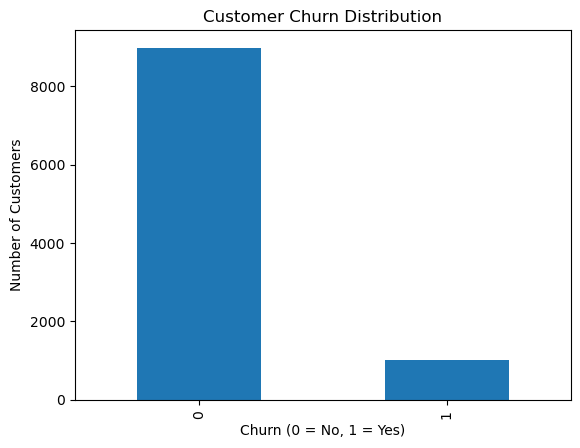

In [133]:
# Visualize the distribution of churned vs non-churned customers
fact_full["churn"].value_counts().plot(kind="bar")
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

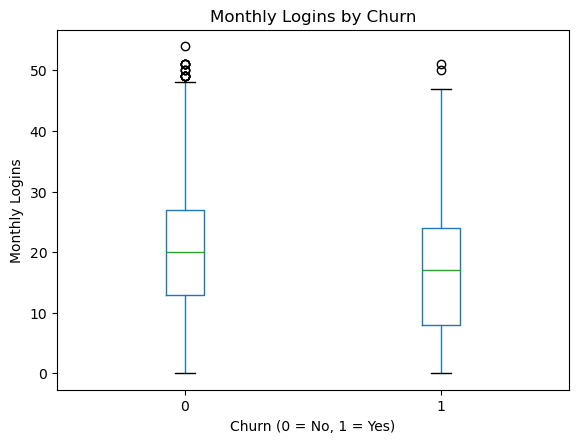

In [134]:
## 13. Comparative Distribution Analysis
# Compare monthly login behavior between churned and retained customers

fact_full.boxplot(
    column="monthly_logins",
    by="churn",
    grid=False
)
plt.title("Monthly Logins by Churn")
plt.suptitle("")  # removes extra title
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Logins")
plt.show()

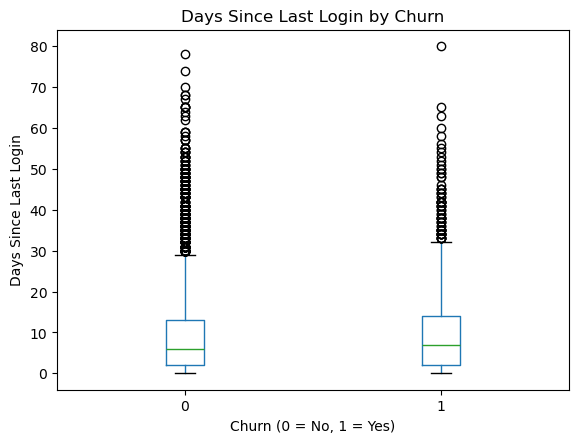

In [65]:
# Compare days since last login between churned and retained customers
fact_full.boxplot(
    column="last_login_days_ago",
    by="churn",
    grid=False
)
plt.title("Days Since Last Login by Churn")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Days Since Last Login")
plt.show()

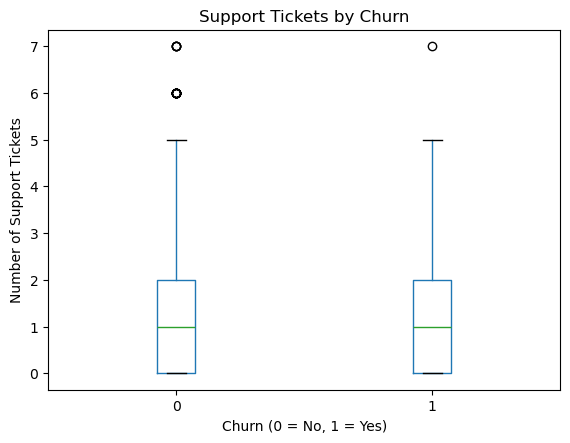

In [66]:
# Compare number of support tickets between churned and retained customers
fact_full.boxplot(
    column="support_tickets",
    by="churn",
    grid=False
)
# Improve plot readability
plt.title("Support Tickets by Churn")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Support Tickets")
plt.show()

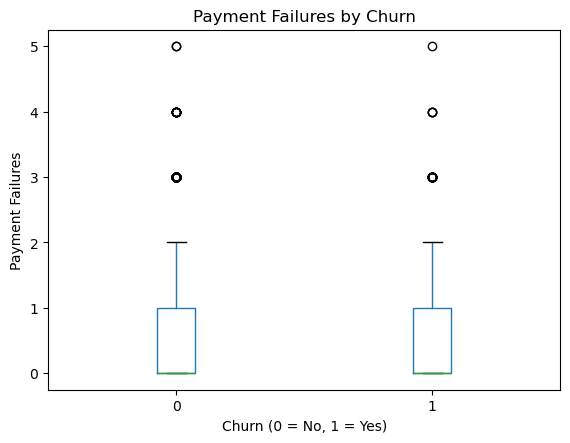

In [67]:
# Compare payment failure counts between churned and retained customers
fact_full.boxplot(
    column="payment_failures",
    by="churn",
    grid=False
)
plt.title("Payment Failures by Churn")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Payment Failures")
plt.show()

In [68]:
# Calculate overall churn rate as a percentage
churn_rate = fact_full["churn"].mean() * 100

In [69]:
churn_rate

np.float64(10.209999999999999)

In [70]:
## 14. Risk Segmentation Preparation
# Create a copy of the full dataset for churn risk flagging and segmentation
segmentation_df = fact_full.copy()

In [71]:
# Flag customers with low engagement based on monthly login activity
segmentation_df["low_engagement"] = segmentation_df["monthly_logins"] < 15

In [72]:
segmentation_df

,customer_id,monthly_logins,weekly_active_days,avg_session_time,features_used,usage_growth_rate,last_login_days_ago,monthly_fee,total_revenue,payment_failures,...,age,country,city,customer_segment,signup_channel,contract_type,tenure_months,complaint_type,survey_response,low_engagement
0,cust_00001,26,7,11.762372,5,0.06,7,30,660,1,...,68,bangladesh,london,sme,web,monthly,22,service,satisfied,False
1,cust_00002,7,5,26.846390,1,-0.28,2,30,270,1,...,57,canada,sydney,individual,mobile,monthly,9,billing,neutral,True
2,cust_00003,19,5,23.380065,6,0.13,23,20,1160,2,...,24,germany,new york,sme,web,yearly,58,service,neutral,False
3,cust_00004,34,7,24.243136,2,-0.17,24,30,570,0,...,49,australia,dhaka,individual,mobile,yearly,19,technical,neutral,False
4,cust_00005,20,6,18.872323,2,-0.16,2,50,2600,0,...,65,bangladesh,delhi,individual,web,monthly,52,technical,unsatisfied,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,cust_09996,15,2,16.902793,3,0.31,3,20,740,1,...,67,germany,sydney,sme,web,yearly,37,service,satisfied,False
9996,cust_09997,13,2,36.333412,5,0.38,4,50,2100,1,...,26,usa,toronto,individual,mobile,yearly,42,no complaint,unsatisfied,True
9997,cust_09998,15,6,22.089879,5,0.21,7,20,780,3,...,18,canada,sydney,individual,mobile,yearly,39,technical,satisfied,False
9998,cust_09999,14,0,23.549487,5,-0.05,10,30,1560,2,...,30,usa,delhi,individual,web,monthly,52,no complaint,neutral,True


In [73]:
# Flag customers who have been inactive for more than 30 days
segmentation_df["inactive"] = segmentation_df["last_login_days_ago"] > 30

In [74]:
segmentation_df

,customer_id,monthly_logins,weekly_active_days,avg_session_time,features_used,usage_growth_rate,last_login_days_ago,monthly_fee,total_revenue,payment_failures,...,country,city,customer_segment,signup_channel,contract_type,tenure_months,complaint_type,survey_response,low_engagement,inactive
0,cust_00001,26,7,11.762372,5,0.06,7,30,660,1,...,bangladesh,london,sme,web,monthly,22,service,satisfied,False,False
1,cust_00002,7,5,26.846390,1,-0.28,2,30,270,1,...,canada,sydney,individual,mobile,monthly,9,billing,neutral,True,False
2,cust_00003,19,5,23.380065,6,0.13,23,20,1160,2,...,germany,new york,sme,web,yearly,58,service,neutral,False,False
3,cust_00004,34,7,24.243136,2,-0.17,24,30,570,0,...,australia,dhaka,individual,mobile,yearly,19,technical,neutral,False,False
4,cust_00005,20,6,18.872323,2,-0.16,2,50,2600,0,...,bangladesh,delhi,individual,web,monthly,52,technical,unsatisfied,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,cust_09996,15,2,16.902793,3,0.31,3,20,740,1,...,germany,sydney,sme,web,yearly,37,service,satisfied,False,False
9996,cust_09997,13,2,36.333412,5,0.38,4,50,2100,1,...,usa,toronto,individual,mobile,yearly,42,no complaint,unsatisfied,True,False
9997,cust_09998,15,6,22.089879,5,0.21,7,20,780,3,...,canada,sydney,individual,mobile,yearly,39,technical,satisfied,False,False
9998,cust_09999,14,0,23.549487,5,-0.05,10,30,1560,2,...,usa,delhi,individual,web,monthly,52,no complaint,neutral,True,False


In [75]:
# Flag customers with frequent support interactions
segmentation_df["high_support"] = segmentation_df["support_tickets"] >= 3

# Flag customers facing repeated billing or payment issues
segmentation_df["billing_issues"] = segmentation_df["payment_failures"] >= 2

In [76]:
# Create a simple churn risk score by summing individual risk flags
segmentation_df["risk_score"] = (
    segmentation_df["low_engagement"].astype(int) +
    segmentation_df["inactive"].astype(int) +
    segmentation_df["high_support"].astype(int) +
    segmentation_df["billing_issues"].astype(int)
)

In [77]:
# Map risk scores into clear churn risk segments
def assign_risk_segment(score):
    if score >= 3:
        return "High Risk"
    elif score >= 1:
        return "Medium Risk"
    else:
        return "Low Risk"

# Assign churn risk segment to each customer based on risk score
segmentation_df["churn_risk_segment"] = segmentation_df["risk_score"].apply(assign_risk_segment)

In [78]:
# View distribution of customers across churn risk segments
segmentation_df["churn_risk_segment"].value_counts()

churn_risk_segment
Low Risk       5262
Medium Risk    4670
High Risk        68
Name: count, dtype: int64

In [79]:
# Compare actual churn rate across different risk segments
segmentation_df.groupby("churn_risk_segment")["churn"].mean().sort_values(ascending=False)

churn_risk_segment
High Risk      0.250000
Medium Risk    0.139615
Low Risk       0.066895
Name: churn, dtype: float64

In [80]:
## 15. Machine Learning Feature Selection

# Define input features for the churn prediction model
ml_features = [
    # Engagement
    "monthly_logins",
    "weekly_active_days",
    "avg_session_time",
    "features_used",
    "last_login_days_ago",

    # Support
    "support_tickets",
    "avg_resolution_time",
    "escalations",

    # Billing
    "monthly_fee",
    "payment_failures",
    "price_increase_last_3m",

    # Engagement feedback
    "email_open_rate",
    "marketing_click_rate",
    "nps_score",
    "referral_count"
]


# Create feature matrix (X) and target variable (y)
X = fact_full[ml_features].copy()
y = fact_full["churn"]


In [81]:
# Convert binary categorical features into numeric format for modeling
binary_columns = ["price_increase_last_3m"]

for col in binary_columns:
    X[col] = X[col].map({"yes": 1, "no": 0})

In [82]:
X[binary_columns].head()
X[binary_columns].dtypes

price_increase_last_3m    int64
dtype: object

In [83]:
X.dtypes

monthly_logins              int64
weekly_active_days          int64
avg_session_time          float64
features_used               int64
last_login_days_ago         int64
support_tickets             int64
avg_resolution_time       float64
escalations                 int64
monthly_fee                 int64
payment_failures            int64
price_increase_last_3m      int64
email_open_rate           float64
marketing_click_rate      float64
nps_score                   int64
referral_count              int64
dtype: object

In [84]:
## 16. Train–Test Split

# Split data into training and testing sets for model evaluation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25, # keep 25% data for testing
    random_state=42, 
    stratify=y
)

In [85]:
## 17. Model Training – Logistic Regression

from sklearn.linear_model import LogisticRegression

# Initialize model with balanced class weights to handle class imbalance and train model on training dataset
log_model = LogisticRegression(max_iter=1000, class_weight = "balanced")
log_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [86]:
## 18. Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
log_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)
# Train the model using scaled training data
log_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [88]:
## 19. Probability Prediction & Threshold Tuning

# Predict churn probabilities for the test set
y_proba = log_model.predict_proba(X_test_scaled)[:, 1]

# Apply a custom probability threshold 0.4 to classify churn
y_pred_custom = (y_proba >= 0.4).astype(int)

In [89]:
## 20. Model Evaluation
from sklearn.metrics import classification_report

#y_pred = log_model.predict(X_test)
# Generate classification report using custom threshold predictions
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.94      0.26      0.40      2245
           1       0.12      0.86      0.21       255

    accuracy                           0.32      2500
   macro avg       0.53      0.56      0.30      2500
weighted avg       0.86      0.32      0.38      2500



In [90]:
## 21. Test Set Result Mapping
# Extract segmentation data for test-set customers to analyze model results
final_df = segmentation_df.loc[X_test.index].copy()

In [91]:
y_proba = log_model.predict_proba(X_test_scaled)[:, 1]

In [92]:
# Attach predicted churn probability to each test-set customer
final_df["churn_probability"] = y_proba

In [93]:
# Flag customers as churned based on the chosen probability threshold
final_df["churn_flag"] = (final_df["churn_probability"] >= 0.4).astype(int)

In [94]:
## 22. Business Action Mapping

# Define business actions based on churn prediction and risk segment
def assign_action(row):
    if row["churn_flag"] == 1 and row["churn_risk_segment"] == "High Risk":
        return "Immediate Retention Call"
    elif row["churn_flag"] == 1 and row["churn_risk_segment"] == "Medium Risk":
        return "Targeted Offer / Discount"
    elif row["churn_flag"] == 1 and row["churn_risk_segment"] == "Low Risk":
        return "Monitor Closely"
    else:
        return "No Action"

In [95]:
# Assign recommended retention action to each customer
final_df["recommended_action"] = final_df.apply(assign_action, axis=1)

In [96]:
final_df

,customer_id,monthly_logins,weekly_active_days,avg_session_time,features_used,usage_growth_rate,last_login_days_ago,monthly_fee,total_revenue,payment_failures,...,survey_response,low_engagement,inactive,high_support,billing_issues,risk_score,churn_risk_segment,churn_probability,churn_flag,recommended_action
9396,cust_09397,16,2,1.000000,8,0.06,2,20,940,0,...,satisfied,False,False,False,False,0,Low Risk,0.427047,1,Monitor Closely
2619,cust_02620,16,3,13.228768,4,0.09,0,10,490,1,...,neutral,False,False,False,False,0,Low Risk,0.505037,1,Monitor Closely
6559,cust_06560,28,2,14.121739,9,-0.22,35,20,180,0,...,satisfied,False,True,False,False,1,Medium Risk,0.438124,1,Targeted Offer / Discount
8834,cust_08835,27,3,16.580862,3,0.06,0,100,4500,1,...,satisfied,False,False,False,False,0,Low Risk,0.491772,1,Monitor Closely
4934,cust_04935,17,0,4.666464,9,-0.15,0,20,760,0,...,satisfied,False,False,False,False,0,Low Risk,0.451510,1,Monitor Closely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,cust_02814,4,7,3.587288,6,0.12,0,10,400,1,...,neutral,True,False,False,False,1,Medium Risk,0.631150,1,Targeted Offer / Discount
5516,cust_05517,28,3,17.655937,6,-0.21,2,10,380,0,...,satisfied,False,False,False,False,0,Low Risk,0.372288,0,No Action
7063,cust_07064,0,0,17.051669,5,-0.16,4,70,2100,0,...,satisfied,True,False,False,False,1,Medium Risk,0.611638,1,Targeted Offer / Discount
2863,cust_02864,29,4,24.211352,10,-0.04,12,100,5900,2,...,satisfied,False,False,False,True,1,Medium Risk,0.664776,1,Targeted Offer / Discount


In [97]:
# Analyze how actual churn is distributed across recommended actions
final_df.groupby("recommended_action")["churn"].value_counts().sort_values(ascending=False)

recommended_action         churn
Targeted Offer / Discount  0        949
Monitor Closely            0        713
No Action                  0        577
Targeted Offer / Discount  1        165
Monitor Closely            1         51
No Action                  1         35
Immediate Retention Call   0          6
                           1          4
Name: count, dtype: int64

In [98]:
# Summarize customer count and churn impact for each recommended action
summary = (
    final_df
    .groupby("recommended_action")["churn"]
    .agg(
        total_customers="count",
        churned_customers="sum",
        churn_rate="mean"
    )
    .sort_values("churn_rate", ascending=False)
)

In [99]:
## Scale full feature set to generate churn predictions for all 10000 customers
X_full_scaled = scaler.transform(X)

In [100]:
# Predict churn probabilities for all customers using the trained model
y_proba_full = log_model.predict_proba(X_full_scaled)[:, 1]

In [101]:
## 23. Full Dataset Scoring (Production Simulation)

# Create a production copy of the dataset for full customer scoring
prod_df = segmentation_df.copy()

# Attach churn probability predictions for all customers
prod_df["churn_probability"] = y_proba_full

In [102]:
# Flag churned customers in the full dataset using the selected threshold
prod_df["churn_flag"] = (prod_df["churn_probability"] >= 0.4).astype(int)

In [103]:
prod_df["recommended_action"] = prod_df.apply(assign_action, axis=1)

In [104]:
# Summarize how many customers are flagged for churn under each recommended action
prod_summary = (
    prod_df
    .groupby("recommended_action")["churn_flag"]
    .agg(
        total_customers="count",
        flagged_customers="sum",
        flagged_rate="mean"
    )
    .sort_values("flagged_rate", ascending=False)
)

In [105]:
prod_summary
# for 10000 customers

,total_customers,flagged_customers,flagged_rate
recommended_action,,,
Immediate Retention Call,68,68,1.0
Monitor Closely,3090,3090,1.0
Targeted Offer / Discount,4381,4381,1.0
No Action,2461,0,0.0


In [106]:
# Summarize how many customers actually churned under each recommended action
prod_summary_actual = (
    prod_df
    .groupby("recommended_action")["churn"]
    .agg(
        total_customers="count",
        churned_customers="sum",
        churn_rate="mean"
    )
    .sort_values("churn_rate", ascending=False)
)

prod_summary_actual
#how many actually churn??

,total_customers,churned_customers,churn_rate
recommended_action,,,
Immediate Retention Call,68,17,0.250000
Targeted Offer / Discount,4381,634,0.144716
Monitor Closely,3090,219,0.070874
No Action,2461,151,0.061357


In [137]:
# Save final scored dataset
prod_df.to_csv("../exports/churn_scored_customers.csv", index=False)

## Final Insights & Recommendations

In [ ]:
# Customers flagged for Immediate Retention Calls showed the highest actual churn (25%)
# Targeted offers reduced churn risk compared to no-action groups
# Low engagement, inactivity, billing failures, and support issues were strong churn indicators
# The model enables proactive retention targeting at scale
